In [767]:
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [768]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [769]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [770]:
#data
credit_csv_Regression = pd.read_csv('/Users/ajayvembu/Downloads/Credit_Data.csv',header=1)

In [771]:
credit_csv_Regression = credit_csv_Regression.drop(201)

In [772]:
credit_csv_Regression = credit_csv_Regression.drop_duplicates()

In [773]:
credit_csv_Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  object 
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  object 
 6   PAY_0                       30000 non-null  object 
 7   PAY_2                       30000 non-null  object 
 8   PAY_3                       30000 non-null  object 
 9   PAY_4                       30000 non-null  object 
 10  PAY_5                       30000 non-null  object 
 11  PAY_6                       30000 non-null  object 
 12  BILL_AMT1                   30000 non-null  object 
 13  BILL_AMT2                   300

In [774]:
credit_csv_Regression['ID'] = credit_csv_Regression['ID'].astype(int)
credit_csv_Regression['LIMIT_BAL'] = credit_csv_Regression['LIMIT_BAL'].astype(int)
credit_csv_Regression['MARRIAGE'] = credit_csv_Regression['MARRIAGE'].astype(int)
credit_csv_Regression['AGE'] = credit_csv_Regression['AGE'].astype(int)
credit_csv_Regression['PAY_0'] = credit_csv_Regression['PAY_0'].astype(int)
credit_csv_Regression['PAY_2'] = credit_csv_Regression['PAY_2'].astype(int)
credit_csv_Regression['PAY_3'] = credit_csv_Regression['PAY_3'].astype(int)
credit_csv_Regression['PAY_4'] = credit_csv_Regression['PAY_4'].astype(int)
credit_csv_Regression['PAY_5'] = credit_csv_Regression['PAY_5'].astype(int)
credit_csv_Regression['PAY_6'] = credit_csv_Regression['PAY_6'].astype(int)
credit_csv_Regression['BILL_AMT1'] = credit_csv_Regression['BILL_AMT1'].astype(int)
credit_csv_Regression['BILL_AMT2'] = credit_csv_Regression['BILL_AMT2'].astype(int)
credit_csv_Regression['BILL_AMT3'] = credit_csv_Regression['BILL_AMT3'].astype(int)
credit_csv_Regression['BILL_AMT4'] = credit_csv_Regression['BILL_AMT4'].astype(int)
credit_csv_Regression['BILL_AMT5'] = credit_csv_Regression['BILL_AMT5'].astype(int)
credit_csv_Regression['BILL_AMT6'] = credit_csv_Regression['BILL_AMT6'].astype(int)
credit_csv_Regression['PAY_AMT1'] = credit_csv_Regression['PAY_AMT1'].astype(int)
credit_csv_Regression['PAY_AMT2'] = credit_csv_Regression['PAY_AMT2'].astype(int)
credit_csv_Regression['PAY_AMT3'] = credit_csv_Regression['PAY_AMT3'].astype(int)
credit_csv_Regression['PAY_AMT4'] = credit_csv_Regression['PAY_AMT4'].astype(int)
credit_csv_Regression['PAY_AMT5'] = credit_csv_Regression['PAY_AMT5'].astype(int)
credit_csv_Regression['PAY_AMT6'] = credit_csv_Regression['PAY_AMT6'].astype(int)

In [775]:
credit_csv_Regression = pd.get_dummies(credit_csv_Regression)

In [776]:
credit_csv_Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30000
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30000 non-null  int64
 1   LIMIT_BAL                               30000 non-null  int64
 2   MARRIAGE                                30000 non-null  int64
 3   AGE                                     30000 non-null  int64
 4   PAY_0                                   30000 non-null  int64
 5   PAY_2                                   30000 non-null  int64
 6   PAY_3                                   30000 non-null  int64
 7   PAY_4                                   30000 non-null  int64
 8   PAY_5                                   30000 non-null  int64
 9   PAY_6                                   30000 non-null  int64
 10  BILL_AMT1                               30000 non-null  int64
 11  BILL_AMT2      

In [777]:
credit_csv_Regression.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1


In [778]:
X = credit_csv_Regression.iloc[:,2:29]

In [779]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30000
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   MARRIAGE                            30000 non-null  int64
 1   AGE                                 30000 non-null  int64
 2   PAY_0                               30000 non-null  int64
 3   PAY_2                               30000 non-null  int64
 4   PAY_3                               30000 non-null  int64
 5   PAY_4                               30000 non-null  int64
 6   PAY_5                               30000 non-null  int64
 7   PAY_6                               30000 non-null  int64
 8   BILL_AMT1                           30000 non-null  int64
 9   BILL_AMT2                           30000 non-null  int64
 10  BILL_AMT3                           30000 non-null  int64
 11  BILL_AMT4                           30000 non-null  int64
 12  BILL

In [780]:
X.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0


In [781]:
y= credit_csv_Regression['LIMIT_BAL']

In [782]:
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [783]:
#Regression
algosClass = []

In [784]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [785]:
algosClass.append(('Linear Regression',LinearRegression()))

In [786]:
algosClass.append(('Support Vector Regression',SVR()))

In [787]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, 
    scoring='r2')
    names.append(name)
    results.append(result)

In [788]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46806924662896304
Linear Regression 0.3581989426610764
Support Vector Regression -0.050380094472762


In [789]:
# Building the model with no discretization 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=123)

In [790]:
X_train.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
16396,2,36,0,0,0,0,0,0,29026,28179,28695,19370,10155,3788,5000,5018,1000,3000,0,7013,1,0,1,0,0,0,0
21449,2,30,-1,-1,-1,0,0,0,777,612,87426,171244,150897,117870,612,87426,130007,3018,15000,51663,1,0,1,0,0,0,0
20035,1,44,-2,-2,-2,-2,-2,-2,-18,-18,-18,-18,-18,-18,0,0,0,0,0,0,1,0,0,1,0,0,0
25756,1,30,0,0,0,0,0,0,101596,102860,104694,103058,71095,47379,3706,5502,4204,3017,2005,1702,1,0,0,0,0,1,0
1439,2,54,1,2,0,0,0,0,48153,46885,27168,27585,27910,27380,0,1400,1200,1500,1000,1500,0,1,0,0,0,1,0


In [791]:
X_train.count()

MARRIAGE                              21000
AGE                                   21000
PAY_0                                 21000
PAY_2                                 21000
PAY_3                                 21000
PAY_4                                 21000
PAY_5                                 21000
PAY_6                                 21000
BILL_AMT1                             21000
BILL_AMT2                             21000
BILL_AMT3                             21000
BILL_AMT4                             21000
BILL_AMT5                             21000
BILL_AMT6                             21000
PAY_AMT1                              21000
PAY_AMT2                              21000
PAY_AMT3                              21000
PAY_AMT4                              21000
PAY_AMT5                              21000
PAY_AMT6                              21000
SEX_female                            21000
SEX_male                              21000
EDUCATION_graduate school       

In [792]:
X_test.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
25666,2,26,-1,0,0,0,-1,0,28991,24391,13600,0,44024,18697,1300,1000,0,22373,680,10000,1,0,0,0,0,1,0
16465,1,59,0,0,0,0,0,0,75662,70073,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006,1,0,0,1,0,0,0
22387,2,30,2,2,2,2,2,2,155910,158819,161487,157577,168094,170922,6800,6500,0,13000,5500,1000,1,0,1,0,0,0,1
10150,1,41,-2,-2,-2,-2,-2,-2,23570,735,0,0,0,0,742,0,0,0,0,0,1,0,0,0,0,1,1
8730,1,43,0,0,0,0,0,0,8214,8034,9044,9225,9417,9617,1140,1150,331,341,356,330,0,1,0,0,0,1,0


In [793]:
X_test.count()

MARRIAGE                              9000
AGE                                   9000
PAY_0                                 9000
PAY_2                                 9000
PAY_3                                 9000
PAY_4                                 9000
PAY_5                                 9000
PAY_6                                 9000
BILL_AMT1                             9000
BILL_AMT2                             9000
BILL_AMT3                             9000
BILL_AMT4                             9000
BILL_AMT5                             9000
BILL_AMT6                             9000
PAY_AMT1                              9000
PAY_AMT2                              9000
PAY_AMT3                              9000
PAY_AMT4                              9000
PAY_AMT5                              9000
PAY_AMT6                              9000
SEX_female                            9000
SEX_male                              9000
EDUCATION_graduate school             9000
EDUCATION_h

In [794]:
#using Support Vector Regressor 
algo = SVR()

In [795]:
model = algo.fit(X_train,y_train)

In [796]:
predictions = model.predict(X_test)

In [797]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [798]:
predRsquared = r2_score(y_test,predictions)

In [799]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.037
RMSE: 131045.067


In [800]:
correlation = round(pearsonr(predictions, y_test)[0], 5)
print(correlation)

0.40778


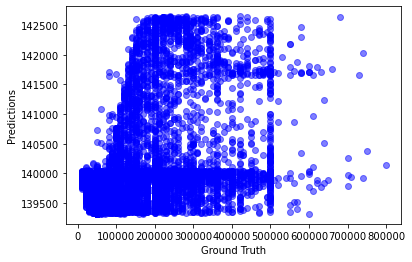

In [801]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [802]:
# model after using BILL_AMT4_bins 
credit_csv_Regression['BILL_AMT4_bins'] = pd.cut(x=credit_csv_Regression['BILL_AMT4'],  bins=[-81334.000000, 1763.000000, 18104.500000, 50190.500000, 927171.000000], labels=[1, 2, 3, 4])

In [803]:
mid = credit_csv_Regression['BILL_AMT4_bins']
credit_csv_Regression.drop(labels=['BILL_AMT4_bins'], axis=1, inplace = True)
credit_csv_Regression.insert(0, 'BILL_AMT4_bins', mid)
credit_csv_Regression

,BILL_AMT4_bins,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0
1,2,2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0
2,2,3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1
3,3,4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1
4,3,5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,4,29996,220000,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,1,0,1,0,0,0,1
29997,2,29997,150000,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,1,0,1,0,0,0,1
29998,3,29998,30000,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,0,1,0,0,0,1,1,0
29999,4,29999,80000,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,0,1,0,1,0,0,1,0


In [804]:
credit_csv_Regression.head()

,BILL_AMT4_bins,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0
1,2,2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0
2,2,3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1
3,3,4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1
4,3,5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1


In [805]:
credit_csv_Regression.insert(0, 'BILL_AMT4_bins',credit_csv_Regression.pop('BILL_AMT4_bins'))

In [806]:
credit_csv_Regression.pop('BILL_AMT4_bins')

0        1
1        2
2        2
3        3
4        3
        ..
29996    4
29997    2
29998    3
29999    4
30000    3
Name: BILL_AMT4_bins, Length: 30000, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [807]:
credit_csv_Regression.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1


In [808]:
X_BILL_AMT4_bins = credit_csv_Regression.iloc[:,2:29]

In [809]:
X_BILL_AMT4_bins.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0


In [810]:
y_BILL_AMT4_bins = credit_csv_Regression['LIMIT_BAL']

In [811]:
y_BILL_AMT4_bins.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [812]:
X_BILL_AMT4_bins_train, X_BILL_AMT4_bins_test, y_BILL_AMT4_bins_train, y_BILL_AMT4_bins_test = train_test_split(X_BILL_AMT4_bins, y_BILL_AMT4_bins, test_size = .30, random_state=123)

In [813]:
model = algo.fit(X_BILL_AMT4_bins_train, y_BILL_AMT4_bins_train)

In [814]:
preds = model.predict(X_BILL_AMT4_bins_test)

In [815]:
rmse = sqrt(mean_squared_error(y_BILL_AMT4_bins_test, predictions))

In [816]:
predRsquared = r2_score(y_BILL_AMT4_bins_test,predictions)

In [817]:
#Make Predictions
predictions = model.predict(X_BILL_AMT4_bins_test)
predRsquared = r2_score(y_BILL_AMT4_bins_test,predictions)
rmse = sqrt(mean_squared_error(y_BILL_AMT4_bins_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.037
RMSE: 131045.067


In [818]:
correlation = round(pearsonr(predictions, y_BILL_AMT4_bins_test)[0], 5)
print(correlation)

0.40778


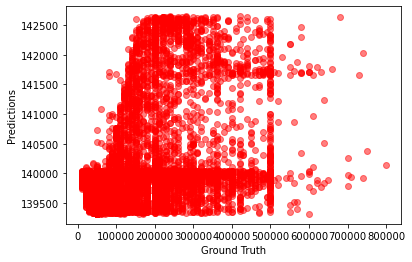

In [819]:
plt.scatter(y_BILL_AMT4_bins_test, predictions, color=['red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [735]:
#using Linear Regressor model
algo = LinearRegression()

In [736]:
model = algo.fit(X_train,y_train)

In [737]:
predictions = model.predict(X_test)

In [738]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [739]:
predRsquared = r2_score(y_test,predictions)

In [740]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.360
RMSE: 102975.437


In [741]:
correlation = round(pearsonr(predictions, y_test)[0], 5)
print(correlation)

0.59973


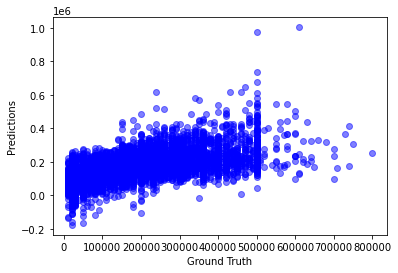

In [742]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [669]:
#using Random Forest Regressor as it has the highest cross validation score
algo = RandomForestRegressor()

In [670]:
model = algo.fit(X_train,y_train)

In [671]:
predictions = model.predict(X_test)

In [672]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [673]:
predRsquared = r2_score(y_test,predictions)

In [674]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.471
RMSE: 93591.065


In [675]:
correlation = round(pearsonr(predictions, y_test)[0], 5)
print(correlation)

0.68738


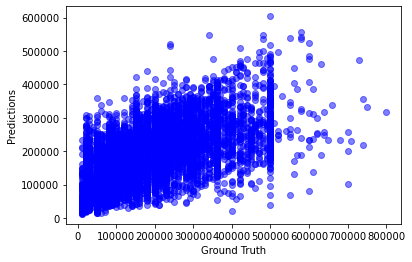

In [676]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [677]:
# model after discretizing the age( for 6 bins)
credit_csv_Regression['age_bins'] = pd.cut(x=credit_csv_Regression['AGE'], bins=[20, 40, 60, 80], labels=[1, 2, 3])

In [678]:
print(credit_csv_Regression['age_bins'])

0        1
1        1
2        1
3        1
4        2
        ..
29996    1
29997    2
29998    1
29999    2
30000    2
Name: age_bins, Length: 30000, dtype: category
Categories (3, int64): [1 < 2 < 3]


In [679]:
credit_csv_Regression.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,age_bins
0,1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,1
1,2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0,1
2,3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1,1
3,4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1,1
4,5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1,2


In [680]:
credit_csv_Regression.pop('AGE')

0        24
1        26
2        34
3        37
4        57
         ..
29996    39
29997    43
29998    37
29999    41
30000    46
Name: AGE, Length: 30000, dtype: int64

In [681]:
credit_csv_Regression.head()

,ID,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,age_bins
0,1,20000,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,1
1,2,120000,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0,1
2,3,90000,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1,1
3,4,50000,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1,1
4,5,50000,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1,2


In [682]:
credit_csv_Regression.insert(3, 'age_bins', credit_csv_Regression.pop('age_bins'))

In [683]:
credit_csv_Regression.head()

,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1


In [684]:
X_Age_Discrete = credit_csv_Regression.iloc[:,3:29]

In [685]:
X_Age_Discrete.head()

,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1
1,1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1
2,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0
4,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0


In [686]:
y_Age_Discrete = credit_csv_Regression['LIMIT_BAL']

In [687]:
y_Age_Discrete.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [688]:
X_Age_Discrete_train, X_Age_Discrete_test, y_Age_Discrete_train, y_Age_Discrete_test = train_test_split(X_Age_Discrete, y_Age_Discrete, test_size = .30, random_state=123)

In [689]:
model = algo.fit(X_Age_Discrete_train,y_Age_Discrete_train)

In [690]:
preds = model.predict(X_Age_Discrete_test)

In [691]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [692]:
predRsquared = r2_score(y_test,predictions)

In [693]:
#Make Predictions
predictions = model.predict(X_Age_Discrete_test)
predRsquared = r2_score(y_Age_Discrete_test,predictions)
rmse = sqrt(mean_squared_error(y_Age_Discrete_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.427
RMSE: 97375.185


In [694]:
correlation = round(pearsonr(predictions, y_Age_Discrete_test)[0], 5)
print(correlation)

0.6554


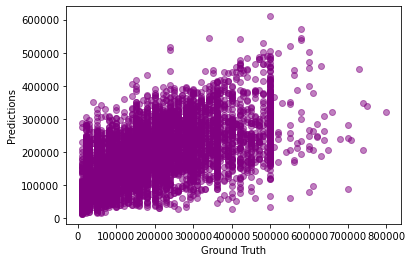

In [695]:
plt.scatter(y_Age_Discrete_test, predictions, color=['purple'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [696]:
pd.set_option('display.max_columns', 999)

In [697]:
credit_csv_Regression.describe()

,ID,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800
std,8660.398374,129747.661567,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062
min,1.000000,10000.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,15000.500000,140000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22500.250000,240000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,30000.000000,1000000.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [698]:
# model after using BILL_AMT5_bins 
credit_csv_Regression['BILL_AMT5_bins'] = pd.cut(x=credit_csv_Regression['BILL_AMT5'],  bins=[-81334.000000, 1763.000000, 18104.500000, 50190.500000, 927171.000000], labels=[1, 2, 3, 4])

In [699]:
credit_csv_Regression.head()

,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,BILL_AMT5_bins
0,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,1
1,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0,2
2,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1,2
3,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1,3
4,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1,3


In [700]:
credit_csv_Regression.pop('BILL_AMT5')

0            0
1         3455
2        14948
3        28959
4        19146
         ...  
29996    31237
29997     5190
29998    20582
29999    11855
30000    32428
Name: BILL_AMT5, Length: 30000, dtype: int64

In [701]:
credit_csv_Regression.insert(0, 'BILL_AMT5_bins',credit_csv_Regression.pop('BILL_AMT5_bins'))

In [702]:
credit_csv_Regression.head()

,BILL_AMT5_bins,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0
1,2,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0
2,2,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1
3,3,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1
4,3,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1


In [703]:
X_BILL_AMT5_bins = credit_csv_Regression.iloc[:,3:29]

In [704]:
X_BILL_AMT5_bins.head()

,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1
1,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1
2,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0
4,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0


In [705]:
y_BILL_AMT5_bins = credit_csv_Regression['LIMIT_BAL']

In [706]:
y_BILL_AMT5_bins.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [707]:
X_BILL_AMT5_bins_train, X_BILL_AMT5_bins_test, y_BILL_AMT5_bins_train, y_BILL_AMT5_bins_test = train_test_split(X_BILL_AMT5_bins, y_BILL_AMT5_bins, test_size = .30, random_state=123)

In [708]:
model = algo.fit(X_BILL_AMT5_bins_train, y_BILL_AMT5_bins_train)

In [709]:
preds = model.predict(X_BILL_AMT5_bins_test)

In [710]:
rmse = sqrt(mean_squared_error(y_BILL_AMT5_bins_test, predictions))

In [711]:
predRsquared = r2_score(y_BILL_AMT5_bins_test,predictions)

In [712]:
#Make Predictions
predictions = model.predict(X_BILL_AMT5_bins_test)
predRsquared = r2_score(y_BILL_AMT5_bins_test,predictions)
rmse = sqrt(mean_squared_error(y_BILL_AMT5_bins_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.430
RMSE: 97162.471


In [713]:
correlation = round(pearsonr(predictions, y_BILL_AMT5_bins_test)[0], 5)
print(correlation)

0.65723


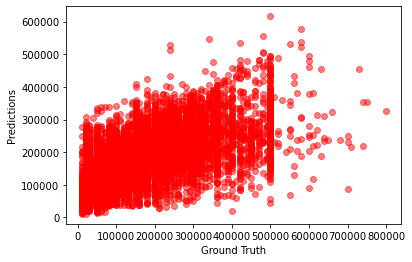

In [714]:
plt.scatter(y_BILL_AMT5_bins_test, predictions, color=['red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [715]:
credit_csv_Regression.describe()

,ID,LIMIT_BAL,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800
std,8660.398374,129747.661567,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062
min,1.000000,10000.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,15000.500000,140000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22500.250000,240000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,30000.000000,1000000.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [716]:
# model after using PAY_AMT6_bins
credit_csv_Regression['PAY_AMT6_bins'] = pd.cut(x=credit_csv_Regression['PAY_AMT6'],  bins=[0.000000, 117.750000, 1500.000000, 4000.000000	, 528666.000000], labels=[1, 2, 3, 4])

In [717]:
credit_csv_Regression.head()

,BILL_AMT5_bins,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,PAY_AMT6_bins
0,1,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,NaN
1,2,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,1,0,3
2,2,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,1,4
3,3,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,0,1,2
4,3,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,0,1,2


In [718]:
credit_csv_Regression.pop('PAY_AMT6')

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29996    1000
29997       0
29998    3100
29999    1804
30000    1000
Name: PAY_AMT6, Length: 30000, dtype: int64

In [719]:
credit_csv_Regression.insert(0, 'PAY_AMT6_bins',credit_csv_Regression.pop('PAY_AMT6_bins'))

In [720]:
credit_csv_Regression.head()

,PAY_AMT6_bins,BILL_AMT5_bins,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,NaN,1,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,1,0,0,0,0,1,1,0
1,3,2,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,1,0,0,0,0,1,1,0
2,4,2,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,1,0,0,0,0,1,0,1
3,2,3,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1,0,0,0,0,1,0,1
4,2,3,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,0,1,0,0,0,1,0,1


In [721]:
mid = credit_csv_Regression['BILL_AMT5_bins']
credit_csv_Regression.drop(labels=['BILL_AMT5_bins'], axis=1, inplace = True)
credit_csv_Regression.insert(29, 'BILL_AMT5_bins', mid)
credit_csv_Regression

,PAY_AMT6_bins,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,BILL_AMT5_bins
0,NaN,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,1,0,0,0,0,1,1,0,1
1,3,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,1,0,0,0,0,1,1,0,2
2,4,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,1,0,0,0,0,1,0,1,2
3,2,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1,0,0,0,0,1,0,1,3
4,2,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,0,1,0,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,2,29996,220000,1,1,0,0,0,0,0,0,188948,192815,208365,88004,15980,8500,20000,5003,3047,5000,0,1,0,1,0,0,0,1,3
29997,NaN,29997,150000,2,2,-1,-1,-1,-1,0,0,1683,1828,3502,8979,0,1837,3526,8998,129,0,0,1,0,1,0,0,0,1,2
29998,3,29998,30000,2,1,4,3,2,-1,0,0,3565,3356,2758,20878,19357,0,0,22000,4200,2000,0,1,0,0,0,1,1,0,3
29999,3,29999,80000,1,2,1,-1,0,0,0,-1,-1645,78379,76304,52774,48944,85900,3409,1178,1926,52964,0,1,0,1,0,0,1,0,2


In [722]:
credit_csv_Regression.head()

,PAY_AMT6_bins,ID,LIMIT_BAL,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,BILL_AMT5_bins
0,NaN,1,20000,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,1,0,0,0,0,1,1,0,1
1,3,2,120000,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,1,0,0,0,0,1,1,0,2
2,4,3,90000,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,1,0,0,0,0,1,0,1,2
3,2,4,50000,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1,0,0,0,0,1,0,1,3
4,2,5,50000,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,0,1,0,0,0,1,0,1,3


In [723]:
X_PAY_AMT6_bins = credit_csv_Regression.iloc[:,3:29]

In [724]:
X_PAY_AMT6_bins.head()

,MARRIAGE,age_bins,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,689,0,0,0,1,0,0,0,0,1,1,0
1,2,1,-1,2,0,0,0,2,2682,1725,2682,3272,3261,0,1000,1000,1000,0,1,0,0,0,0,1,1,0
2,2,1,0,0,0,0,0,0,29239,14027,13559,14331,15549,1518,1500,1000,1000,1000,1,0,0,0,0,1,0,1
3,1,1,0,0,0,0,0,0,46990,48233,49291,28314,29547,2000,2019,1200,1100,1069,1,0,0,0,0,1,0,1
4,1,2,-1,0,-1,0,0,0,8617,5670,35835,20940,19131,2000,36681,10000,9000,689,0,1,0,0,0,1,0,1


In [725]:
y_PAY_AMT6_bins = credit_csv_Regression['LIMIT_BAL']

In [726]:
y_PAY_AMT6_bins.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [727]:
X_PAY_AMT6_bins_train, X_PAY_AMT6_bins_test, y_PAY_AMT6_bins_train, y_PAY_AMT6_bins_test = train_test_split(X_PAY_AMT6_bins, y_PAY_AMT6_bins, test_size = .30, random_state=123)

In [728]:
model = algo.fit(X_PAY_AMT6_bins_train, y_PAY_AMT6_bins_train)

In [729]:
preds = model.predict(X_PAY_AMT6_bins_test)

In [730]:
rmse = sqrt(mean_squared_error(y_PAY_AMT6_bins_test, predictions))

In [731]:
predRsquared = r2_score(y_PAY_AMT6_bins_test,predictions)

In [732]:
#Make Predictions
predictions = model.predict(X_PAY_AMT6_bins_test)
predRsquared = r2_score(y_PAY_AMT6_bins_test,predictions)
rmse = sqrt(mean_squared_error(y_PAY_AMT6_bins_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.420
RMSE: 97960.595


In [733]:
correlation = round(pearsonr(predictions, y_PAY_AMT6_bins_test)[0], 5)
print(correlation)

0.65019


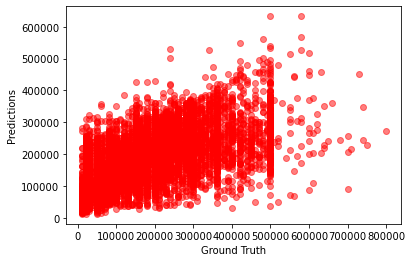

In [734]:
plt.scatter(y_PAY_AMT6_bins_test, predictions, color=['red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();